In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
import seaborn as sns
import matplotlib as mpl

In [2]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 3,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                    }
                   )

In [3]:
datafile = 'truecode-performance-20221130.csv'

In [4]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2022-11-30')

In [5]:
def total_return(prices):
  return prices.iloc[-1] / prices.iloc[0] - 1

In [6]:
prices = pd.read_csv(datafile)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

In [7]:
prices[['Strategy', 'Bitcoin']]

,Strategy,Bitcoin
Date,,
2019-12-19,"10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900"
2019-12-21,"9,981.8100","9,975.4600"
2019-12-22,"10,342.4300","10,491.0800"
2019-12-23,"10,163.9500","10,233.2600"
...,...,...
2022-11-26,"42,801.2400","23,365.1800"
2022-11-27,"42,796.9600","23,322.8900"
2022-11-28,"42,792.6800","23,016.4300"


# Fund Statistics

In [8]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-05-01  2022-05-01
End                  2022-11-30  2022-11-30
Risk-free rate       0.00%       0.00%

Total Return         -12.69%     -53.70%
Daily Sharpe         -0.32       -1.33
Daily Sortino        -0.49       -1.91
CAGR                 -20.76%     -73.30%
Max Drawdown         -29.41%     -59.64%
Calmar Ratio         -0.71       -1.23

MTD                  -10.66%     -16.24%
3m                   -23.45%     -13.37%
6m                   -12.44%     -40.88%
YTD                  -12.69%     -53.70%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  -20.76%     -73.30%

Daily Sharpe         -0.32       -1.33
Daily Sortino        -0.49       -1.91
Daily Mean (ann.)    -10.55%     -74.75%
Daily Vol (ann.)     33.28%      56.38%
Daily Skew           0.36        -0.69
Da

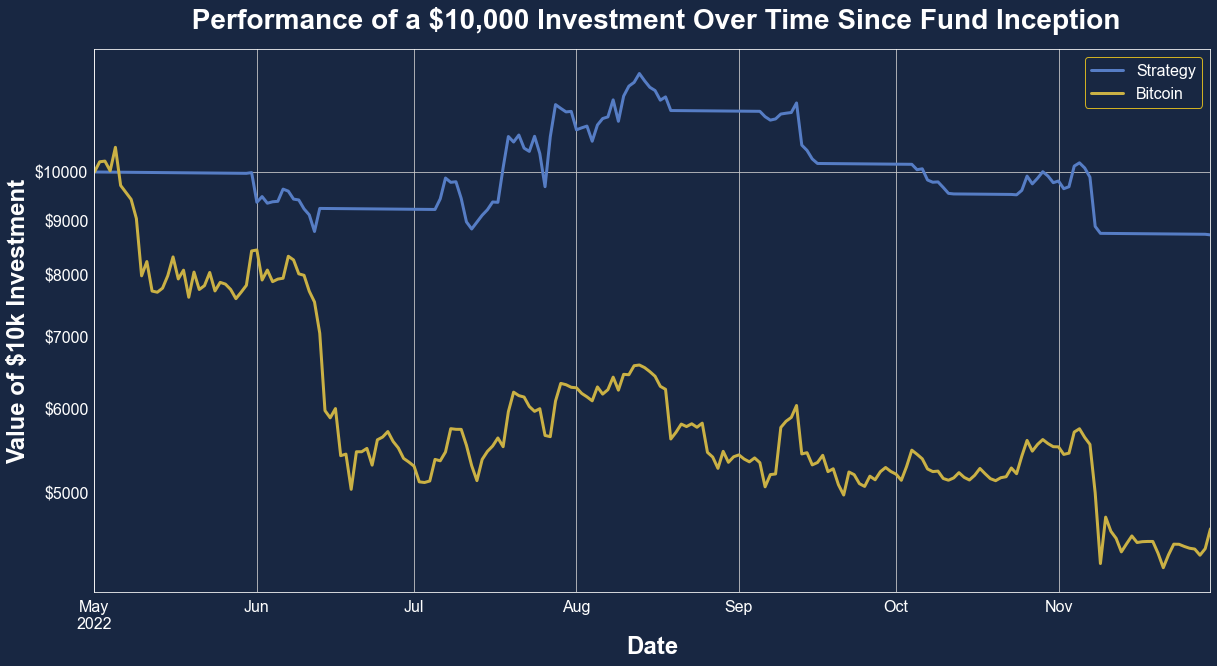

In [9]:
ax = sample[['Strategy', 'Bitcoin']].rebase(value=10000).plot.line(figsize=(20, 10), title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')


# Full History

In [10]:
stats = prices[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2019-12-19  2019-12-19
End                  2022-11-30  2022-11-30
Risk-free rate       0.00%       0.00%

Total Return         327.33%     143.66%
Daily Sharpe         1.13        0.66
Daily Sortino        1.91        1.04
CAGR                 63.65%      35.26%
Max Drawdown         -29.41%     -76.28%
Calmar Ratio         2.16        0.46

MTD                  -10.66%     -16.24%
3m                   -23.45%     -13.37%
6m                   -12.44%     -40.88%
YTD                  -15.06%     -62.30%
1Y                   -22.03%     -69.41%
3Y (ann.)            63.65%      35.26%
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  63.65%      35.26%

Daily Sharpe         1.13        0.66
Daily Sortino        1.91        1.04
Daily Mean (ann.)    40.31%      40.64%
Daily Vol (ann.)     35.63%      61.92%
Daily Skew           0.46        -0.80

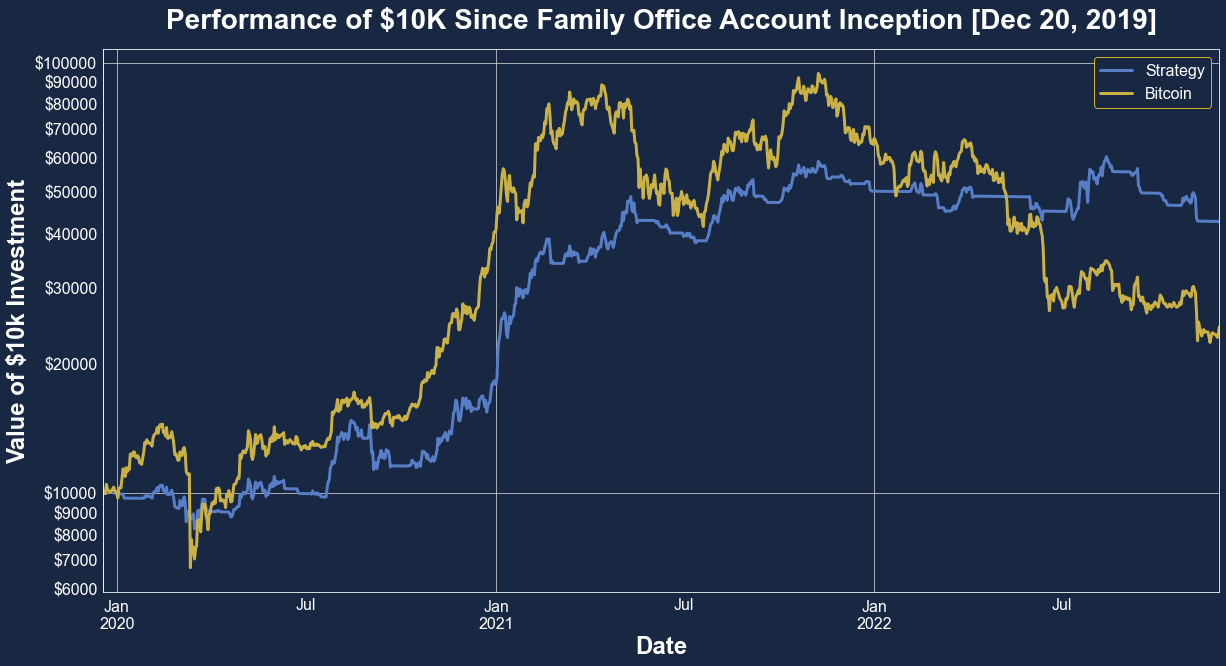

In [11]:
ax = prices[['Strategy', 'Bitcoin']].plot.line(figsize=(20, 10), title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')


In [12]:
strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(total_return)
strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date  Date
2019  12     -0.0041
2020  1      -0.0130
      2      -0.0639
      3      -0.0172
      4       0.0784
      5       0.0441
      6      -0.0877
      7       0.2512
      8       0.0009
      9      -0.1981
      10      0.0315
      11      0.3690
      12      0.1214
2021  1       0.6273
      2       0.1533
      3       0.0415
      4       0.1365
      5       0.0263
      6      -0.0649
      7       0.1174
      8       0.1540
      9      -0.0904
      10      0.1764
      11     -0.0163
      12     -0.0793
2022  1      -0.0016
      2      -0.0189
      3       0.0081
      4      -0.0412
      5      -0.0013
      6      -0.0149
      7       0.2352
      8       0.0413
      9      -0.1081
      10     -0.0391
      11     -0.1098
Name: Strategy, dtype: float64

# Calculate Correlation

In [13]:
corr = prices[['Strategy', 'Bitcoin']].corr()
corr

,Strategy,Bitcoin
Strategy,1.0000,0.7267
Bitcoin,0.7267,1.0000


In [14]:
strategy_corr = corr[['Strategy']].loc['Bitcoin'].iloc[0]
print("Strategy Correlation = {:.4}".format(strategy_corr))

Strategy Correlation = 0.7267


# Calculate Volatility & Beta

In [15]:
strategy_vol = stats['Strategy'].stats['yearly_vol']
benchmark_vol = stats['Bitcoin'].stats['yearly_vol']
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(benchmark_vol))

Strategy Volatility = 0.9733
Bitcoin Volatility = 1.854


# Calculate Beta

In [16]:
beta = strategy_corr * (strategy_vol / benchmark_vol)
print("Strategy Beta = {:.4}".format(beta))

Strategy Beta = 0.3815
